<a href="https://colab.research.google.com/github/DelRosal/DelRosal/blob/main/Subwords_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This code was made as an exercise for the Natural Language Processing Course from the TensorFlow Developer Professional Certification**

In [ ]:
# DOWNLOAD DATASETS
import tensorflow_datasets as tfds

imdb_plaintext, info_plaintext= tfds.load("imdb_reviews", with_info=True, as_supervised=True)

imdb_subwords, info_subwords= tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZ1BJC0/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZ1BJC0/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteZ1BJC0/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteRAUAPK/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteRAUAPK/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteRAUAPK/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
#COMPARISON OF TWO DATASETS
import numpy

#Plain Text
info_plaintext.features
for example in imdb_plaintext["train"].take(2):
  print(example[0].numpy())

print("-----")

#Subwords
info_subwords.features
for example in imdb_subwords["train"].take(2):
  print(example[0].numpy())

print("-----")

#Decoder
tokenizer_subwords=info_subwords.features["text"].encoder
for example in imdb_subwords["train"].take(2):
  print(tokenizer_subwords.decode(example[0]))

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was

In [ ]:
#SUBWORD TEXT ENCONDING

train_data=imdb_plaintext["train"]
training_sentences=[]

for sen,_ in train_data:
  training_sentences.append(sen.numpy().decode("utf8"))

In [ ]:
#TOKENIZER AND PADDING
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size=10000
oov="<OOV>"

tokenizer_plaintext=Tokenizer(num_words=vocab_size, oov_token=oov)
tokenizer_plaintext.fit_on_texts(training_sentences)
sequences=tokenizer_plaintext.texts_to_sequences(training_sentences)

#Decode sentence with words learned and OOV
tokenizer_plaintext.sequences_to_texts(sequences[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [ ]:
#SUBWORDS ADVANTAGES
print(len(tokenizer_plaintext.word_index))
print(tokenizer_subwords.subwords)

print("\n\n-----")

tokenized_string=tokenizer_subwords.encode(training_sentences[0])
print(tokenized_string)

print("-----")

original_string=tokenizer_subwords.decode(tokenized_string)
print(original_string)


88583
['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r

In [ ]:
#COMPARISON

sample_s="TensorFlow, from basics to mastery"

#Plain Text
tokenized_s=tokenizer_plaintext.texts_to_sequences([sample_s])
print("Tokenized string is: {}".format(tokenized_s))

original_s=tokenizer_plaintext.sequences_to_texts(tokenized_s)
print("The original string is: {}". format(original_s))

print("\n-----\n")

#Subwords
tokenized_ss=tokenizer_subwords.encode(sample_s)
print("Tokenized string with Subwords: {}". format(tokenized_ss))

original_ss=tokenizer_subwords.decode(tokenized_ss)
print("Original string with Subwords: {}". format(original_ss))

for part in tokenized_ss:
  print("{} ----> {}". format(part, tokenizer_subwords.decode([part])))

Tokenized string is: [[1, 37, 1, 6, 1]]
The original string is: ['<OOV> from <OOV> to <OOV>']

-----

Tokenized string with Subwords: [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
Original string with Subwords: TensorFlow, from basics to mastery
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [ ]:
#SPLIT PRE TOKENIZED DATASET

BUFFER_SIZE=10000
BATCH_SIZE=64

train_data, test_data= imdb_subwords["train"], imdb_subwords["test"]

train_dataset=train_data.shuffle(BUFFER_SIZE)
train_dataset=train_dataset.padded_batch(BATCH_SIZE)

test_dataset=test_data.padded_batch(BATCH_SIZE)

In [ ]:
#CREATE MODEL
import tensorflow as tf

embedding=16
model=tf.keras.Sequential([tf.keras.layers.Embedding(tokenizer_subwords.vocab_size, embedding),
                           tf.keras.layers.GlobalAveragePooling1D(),
                           tf.keras.layers.Dense(6, activation="relu"),
                           tf.keras.layers.Dense(1, activation="sigmoid")])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          130960    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 131,069
Trainable params: 131,069
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#TRAIN MODEL

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

history=model.fit(train_dataset,
                  epochs=10,
                  validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 13s 28ms/step - loss: 0.6835 - accuracy: 0.5958 - val_loss: 0.6575 - val_accuracy: 0.7218
Epoch 2/10
391/391 [==============================] - 9s 22ms/step - loss: 0.5820 - accuracy: 0.7722 - val_loss: 0.5159 - val_accuracy: 0.8104
Epoch 3/10
391/391 [==============================] - 9s 22ms/step - loss: 0.4390 - accuracy: 0.8428 - val_loss: 0.4122 - val_accuracy: 0.8516
Epoch 4/10
391/391 [==============================] - 11s 28ms/step - loss: 0.3508 - accuracy: 0.8778 - val_loss: 0.3604 - val_accuracy: 0.8625
Epoch 5/10
391/391 [==============================] - 12s 29ms/step - loss: 0.3013 - accuracy: 0.8926 - val_loss: 0.3328 - val_accuracy: 0.8736
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 0.2682 - accuracy: 0.9046 - val_loss: 0.3214 - val_accuracy: 0.8726
Epoch 7/10
391/391 [==============================] - 12s 29ms/step - loss: 0.2454 - accuracy: 0.9125 - val_loss: 0.3124 - val_accuracy: 0

In [ ]:
#VISUALIZE THE RESULTS
import matplotlib.pyplot as plt

def plot_g(history,sub):
  plt.plot(history.history[sub])
  plt.plot(history.history["val_"+sub])
  plt.xlabel("Epochs")
  plt.ylabel(sub)
  plt.legend([sub,"val_"+sub])
  plt.show()


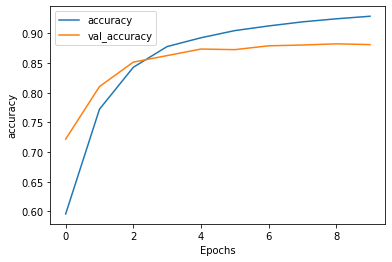

In [ ]:
plot_g(history,"accuracy")

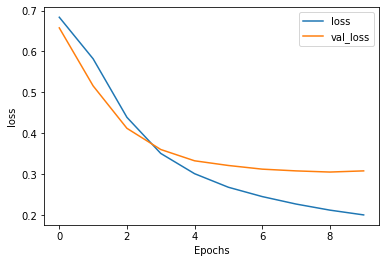

In [ ]:
plot_g(history,"loss")